In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [29]:
# Read the Excel file
df = pd.read_excel("yeni.xlsx", sheet_name="Sheet1", engine="openpyxl")

# Searching for coffee-related keywords
coffee_keywords = ["starbucks", "espresso", "coffy", "yukselen","SABANCI UNIVERSITESI TEMASSIZ".lower()]

brand_count = {
    "Starbucks":0,
    "EspressoLab":0,
    "Coffy":0,
    "Fasshane":0
    }

for a in df['Açıklama']:
  if a.lower().find('starbucks')!=-1:
    brand_count['Starbucks']+=1
  elif a.lower().find('espresso')!=-1:
    brand_count['EspressoLab']+=1
  elif a.lower().find('coffy')!=-1 or a.lower().find("SABANCI UNIVERSITESI TEMASSIZ".lower())!=-1 :
    brand_count['Coffy']+=1
  elif 'YUKSELEN' in a:
    brand_count['Fasshane']+=1

# Filter for coffee transactions
df["IsCoffee"] = df["Açıklama"].apply(
    lambda x: any(keyword.lower() in str(x).lower() for keyword in coffee_keywords)
)


# Create a separate DataFrame with only coffee-related transactions
df_coffee = df[df["IsCoffee"] == True]

print(f"Total coffee transactions:{len(df_coffee)} ")


Total coffee transactions:234 


In [30]:
#Calculates the total number of exam days within the specified exam periods.
def calculate_num_of_exam_days():
  exam_periods = [
        ("2023-01-08", "2023-01-20"),
        ("2023-04-11", "2023-04-24"),
        ("2023-05-30", "2023-06-11"),
        ("2023-11-06", "2023-11-18"),
        ("2024-01-05", "2024-01-19"),
        ("2024-03-22", "2024-04-03"),
        ("2024-05-29", "2024-06-09"),
        ("2024-11-01", "2024-11-16"),
        ("2024-11-29", "2024-12-14"),
        ("2025-01-01", "2025-01-12")
    ]
  total_exam_days = 0
  for start_date_str, end_date_str in exam_periods:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    num_days = (end_date - start_date).days + 1
    total_exam_days += num_days
  return total_exam_days


In [31]:
exam_periods = [
    ("2023-01-08", "2023-01-20"),
    ("2023-04-11", "2023-04-24"),
    ("2023-05-30", "2023-06-11"),
    ("2023-11-06", "2023-11-18"),
    ("2024-01-05", "2024-01-19"),
    ("2024-03-22", "2024-04-03"),
    ("2024-05-29", "2024-06-09"),
    ("2024-11-01", "2024-11-16"),
    ("2024-11-29", "2024-12-14"),
    ("2025-01-01", "2025-01-12")
]

# Label transactions as Exam or Normal
def in_exam_period(date, periods):
  date = pd.to_datetime(date)
  for start, end in periods:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    if start_date <= date <= end_date:
      return "Exam"
  return "Normal"

df["Period_Type"] = df["Tarih"].apply(lambda d: in_exam_period(d, exam_periods))

# Contingency table for Chi-Squared test
exam_count = df[df["Period_Type"] == "Exam"].shape[0]
normal_count = df[df["Period_Type"] == "Normal"].shape[0]

exam_total = calculate_num_of_exam_days()  # Example placeholder
normal_total = 732

A = exam_count   # Coffee transactions during exam period
B = A - exam_total  # Non-coffee during exam period
C = normal_count  # Coffee transactions during normal period
D = C - normal_total # Non-coffee during normal period

contingency_table = np.array([[A, B], [C, D]])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square:", chi2)
print("p-value:", p)

<ipython-input-31-a7769c81e578>:16: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(date)


Chi-Square: 2.3238578479743786
p-value: 0.12740370338717186


Coffe transactions during exam period: 52
Coffe transactions during normal period: 182


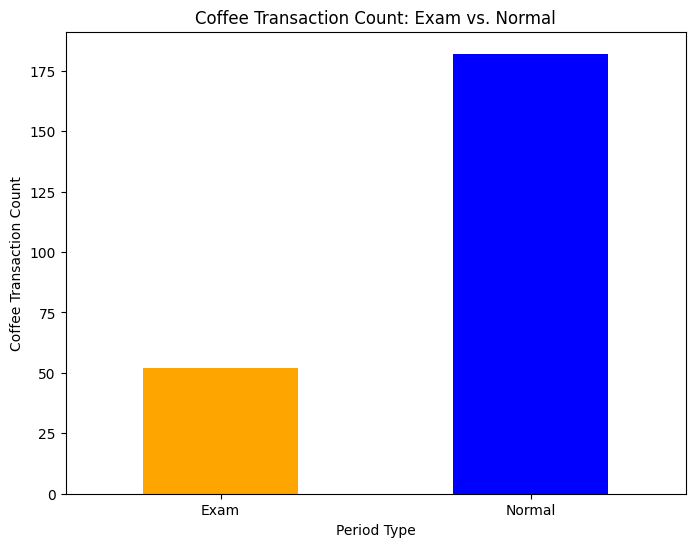

In [32]:
# Visualization for Coffee Transactions Only
plt.figure(figsize=(8, 6))

coffee_transactions = (df[df['IsCoffee'] == True])
df_exam = coffee_transactions[coffee_transactions["Period_Type"] == "Exam"]
df_normal = coffee_transactions[coffee_transactions["Period_Type"] == "Normal"]

print(f"Coffe transactions during exam period: {len(df_exam)}")
print(f"Coffe transactions during normal period: {len(df_normal)}")


# Group by period type and count coffee transactions
coffee_counts = coffee_transactions.groupby("Period_Type")["IsCoffee"].count()

# Plot coffee transaction counts
coffee_counts.plot(kind="bar", color=["orange", "blue"])
plt.title("Coffee Transaction Count: Exam vs. Normal")
plt.xlabel("Period Type")
plt.ylabel("Coffee Transaction Count")
plt.xticks(rotation=0)
plt.show()

<ipython-input-33-b02cdfdf79f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Transaction_Date"] = pd.to_datetime(df_coffee["Tarih"], format="%d.%m.%Y")
<ipython-input-33-b02cdfdf79f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Jitter"] = np.random.uniform(0.7, 1.3, size=len(df_coffee))


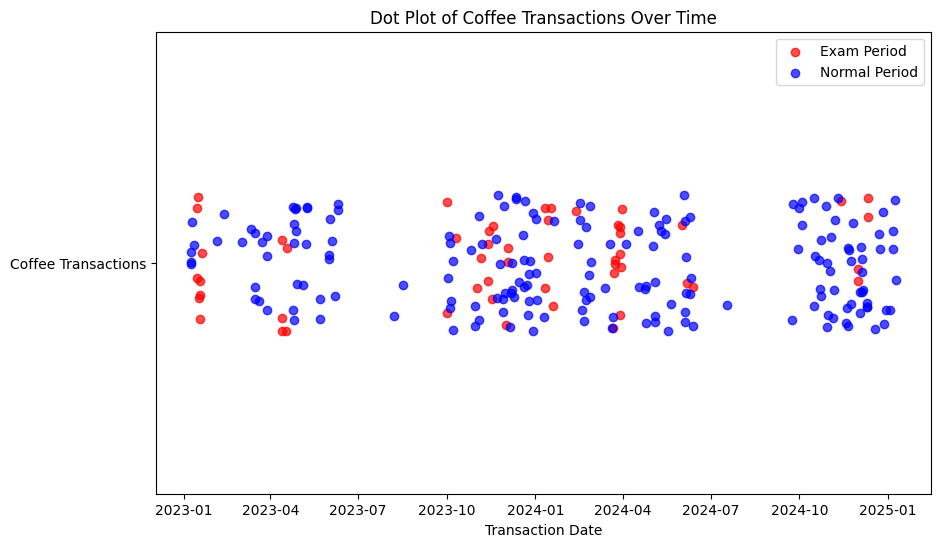

In [33]:
# Checking if Transaction_Date is in datetime format
df_coffee = (df[df['IsCoffee'] == True])
df_coffee["Transaction_Date"] = pd.to_datetime(df_coffee["Tarih"], format="%d.%m.%Y")

# Create a bit of random jitter so points don't overlap exactly if they share the same date
np.random.seed(42)
df_coffee["Jitter"] = np.random.uniform(0.7, 1.3, size=len(df_coffee))

# Separate exam vs. normal transactions
df_exam = df_coffee[df_coffee["Period_Type"] == "Exam"]
df_normal = df_coffee[df_coffee["Period_Type"] == "Normal"]

# Plot Graph
plt.figure(figsize=(10, 6))

# Plot exam transactions in red
plt.scatter(
    df_exam["Transaction_Date"],
    df_exam["Jitter"],
    color="red",
    alpha=0.7,
    label="Exam Period"
)

# Plot normal transactions in blue
plt.scatter(
    df_normal["Transaction_Date"],
    df_normal["Jitter"],
    color="blue",
    alpha=0.7,
    label="Normal Period"
)

# Clean up axes
plt.title("Dot Plot of Coffee Transactions Over Time")
plt.xlabel("Transaction Date")
# Extend the y-limits for a broader range
plt.ylim(0, 2)
# Show a single y-tick labeled as 'Coffee Transactions' (you can add more ticks if desired)
plt.yticks([1], ["Coffee Transactions"])

plt.legend()
plt.show()

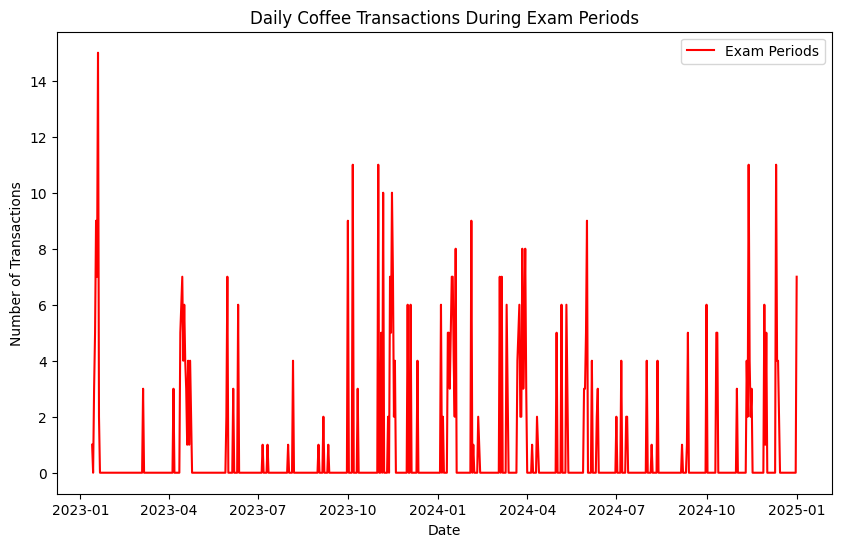

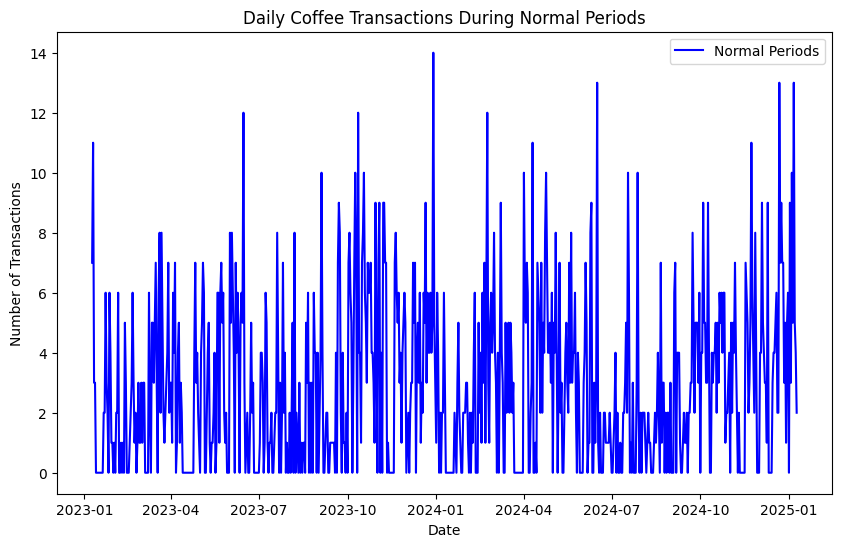

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure your Transaction_Date column is in datetime format
df["Tarih"] = pd.to_datetime(df["Tarih"], format='%d.%m.%Y')

# Create a new column for counting each transaction
df["Transaction_Count"] = 1

# Filter only Exam transactions
df_exam = df[df["Period_Type"] == "Exam"]

# Group by day, summing up the Transaction_Count
df_exam_daily = (
    df_exam.groupby(pd.Grouper(key="Tarih", freq="D"))["Transaction_Count"]
    .sum()
    .reset_index()
    .rename(columns={"Transaction_Count": "Exam_Transactions"})
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_exam_daily["Tarih"], df_exam_daily["Exam_Transactions"], label="Exam Periods", color="red")
plt.title("Daily Coffee Transactions During Exam Periods")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

# Filter only Normal transactions
df_normal = df[df["Period_Type"] == "Normal"]

# Group by day, summing up Transaction_Count
df_normal_daily = (
    df_normal.groupby(pd.Grouper(key="Tarih", freq="D"))["Transaction_Count"]
    .sum()
    .reset_index()
    .rename(columns={"Transaction_Count": "Normal_Transactions"})
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_normal_daily["Tarih"], df_normal_daily["Normal_Transactions"], label="Normal Periods", color="blue")
plt.title("Daily Coffee Transactions During Normal Periods")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()


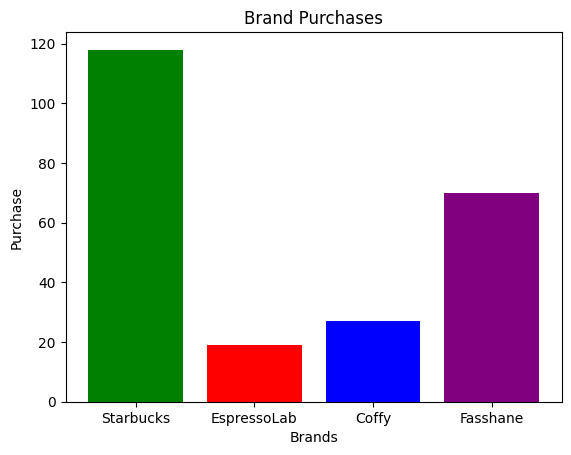

In [49]:
import matplotlib.pyplot as plt
import numpy as np
brands = list(brand_count.keys())
counts = list(brand_count.values())
plt.bar(brands, counts, color=['green', 'red', 'blue', 'purple'])
plt.title('Brand Purchases')
plt.xlabel('Brands')
plt.ylabel('Purchase')
plt.show()

<ipython-input-50-6169aab4a7b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Month"] = df_coffee["Tarih"].dt.month


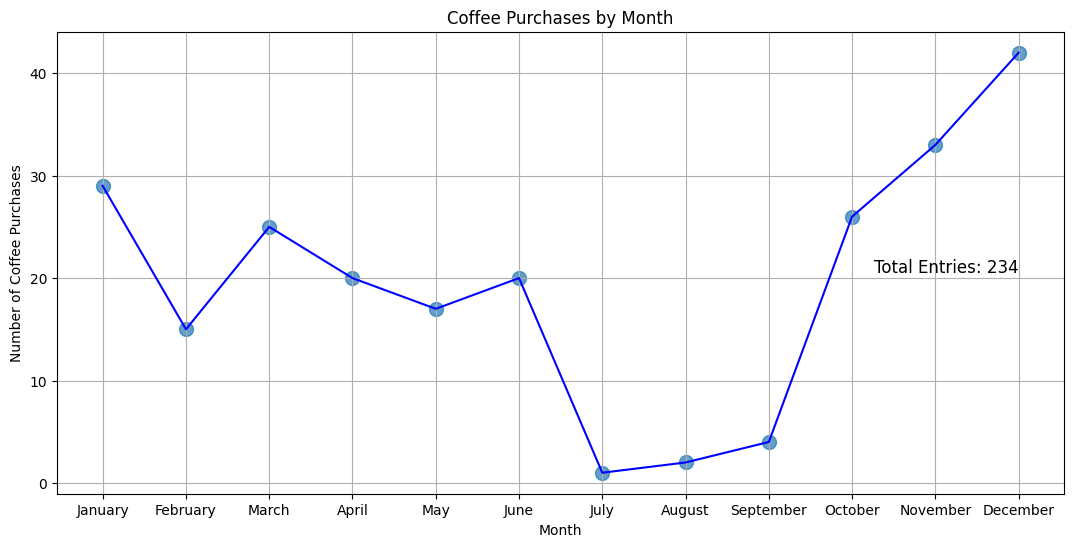

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "Tarih" column to datetime format
df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d.%m.%Y")

# Filter coffee transactions and extract month information
coffee_keywords = ["starbucks", "espresso", "coffy", "yukselen", "sabanci universitesi temassiz"]
df_coffee = df[df["Açıklama"].str.lower().str.contains("|".join(coffee_keywords))]
df_coffee["Month"] = df_coffee["Tarih"].dt.month

# Calculate coffee purchase count by month
coffee_counts_by_month = df_coffee.groupby("Month")["Açıklama"].count().reset_index()

# Calculate total entries
total_entries = len(df_coffee)

# Create the dot graph
plt.figure(figsize=(13, 6))

# Plot the dots
plt.scatter(coffee_counts_by_month["Month"], coffee_counts_by_month["Açıklama"], s=100, alpha=0.7)

# Plot the line connecting the dots
plt.plot(coffee_counts_by_month["Month"], coffee_counts_by_month["Açıklama"], linestyle='-', color='blue')

# Add total entry count to the graph
plt.text(12, coffee_counts_by_month["Açıklama"].max() / 2, f"Total Entries: {total_entries}", ha="right", va="center", fontsize=12)

# Set labels and title in English
plt.xlabel("Month")
plt.ylabel("Number of Coffee Purchases")
plt.title("Coffee Purchases by Month")

# Set x-axis ticks to month names in English
plt.xticks(range(1, 13), ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

plt.grid(True)
plt.show()

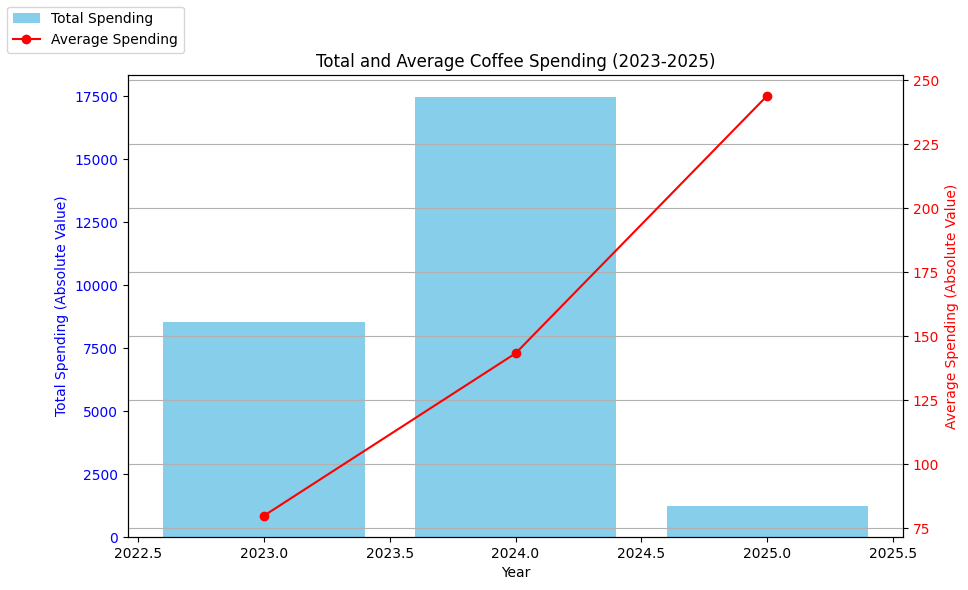

       total_cost  total_count  average_cost
Tarih                                       
2023      -8529.5          107     79.714953
2024     -17474.0          122    143.229508
2025      -1220.0            5    244.000000


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2023, 2024, and 2025
df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d.%m.%Y")
df_filtered = df[(df["Tarih"].dt.year >= 2023) & (df["Tarih"].dt.year <= 2025)]

# Filter for coffee transactions using brand names
coffee_brands = ["starbucks", "espresso", "coffy", "yukselen", "sabanci universitesi temassiz"]
df_coffee = df_filtered[df_filtered["Açıklama"].str.lower().str.contains("|".join(coffee_brands))]

# Calculate total coffee cost and count per year
yearly_data = df_coffee.groupby(df_coffee["Tarih"].dt.year).agg(
    total_cost=("Tutar", "sum"), total_count=("Açıklama", "count")
)

# Calculate average coffee cost per year using absolute value
yearly_data["average_cost"] = yearly_data["total_cost"].abs() / yearly_data["total_count"]

# Create a combined bar and line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total spending
ax1.bar(yearly_data.index, yearly_data["total_cost"].abs(), color="skyblue", label="Total Spending")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Spending (Absolute Value)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for average spending
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data["average_cost"], color="red", marker="o", label="Average Spending")
ax2.set_ylabel("Average Spending (Absolute Value)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add title, legend, and grid
plt.title("Total and Average Coffee Spending (2023-2025)")
fig.legend(loc="upper left")  # Adjust legend location as needed
plt.grid(True)

plt.show()
print(yearly_data[["total_cost", "total_count", "average_cost"]])